In [4]:
import numpy as np
import matplotlib.pyplot as plt

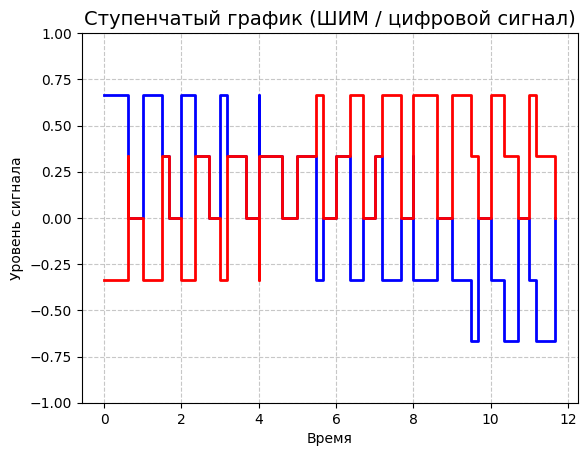

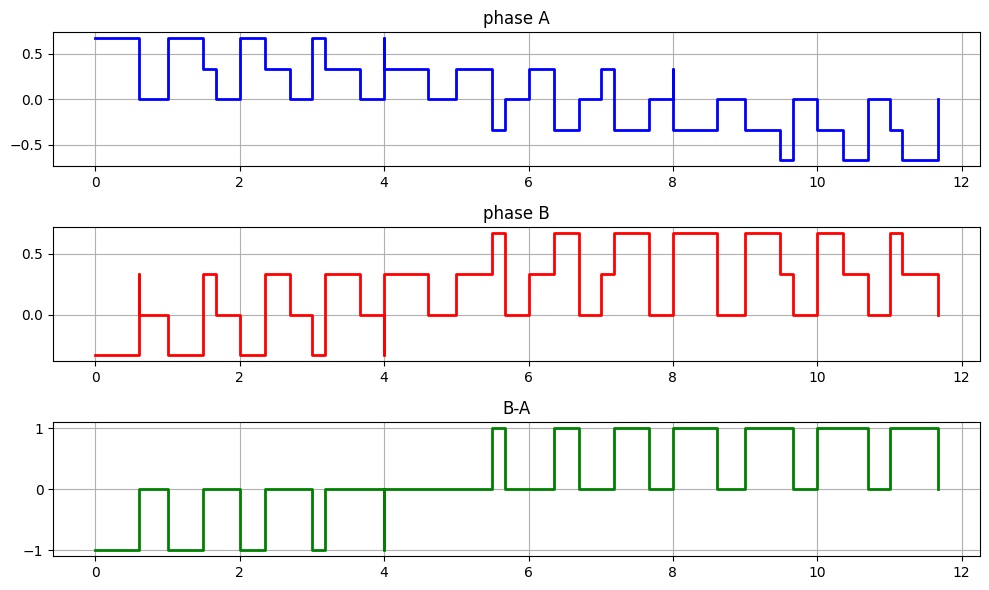

In [ ]:
angle = np.arange(0, np.pi+1,  np.pi/12)
M = 0.7

tn1 = np.array([0.61, 0.49, 0.35, 0.18, 0.00, 0.49, 0.35, 0.18, 0.00, 0.49, 0.35, 0.18])
tn2 = np.array([0.00, 0.18, 0.35, 0.49, 0.61, 0.18, 0.35, 0.49, 0.61, 0.18, 0.35, 0.49])
tn0 = 1-tn1-tn2

time_start = []

for i in  np.arange(0,12,1):
    time_start = np.append(time_start, tn1[i])
    time_start = np.append(time_start, tn2[i])
    time_start = np.append(time_start, tn0[i])

VA = []
VB = []

for i in np.arange(0,12,1):
    if i < 5:
        VA  = np.append(VA,2/3)
        VA  = np.append(VA,1/3)
        VA  = np.append(VA,0)
    elif 5<=i<9:
        VA  = np.append(VA,1/3)
        VA  = np.append(VA,-1/3)
        VA  = np.append(VA,0)
    else:
        VA  = np.append(VA,-1/3)
        VA  = np.append(VA,-2/3)
        VA  = np.append(VA,0)

for i in np.arange(0,12,1):
    if i < 5:
        VB  = np.append(VB,-1/3)
        VB  = np.append(VB,1/3)
        VB  = np.append(VB,0)
    elif 5<=i<9:
        VB  = np.append(VB,1/3)
        VB  = np.append(VB,2/3)
        VB  = np.append(VB,0)
    else:
        VB  = np.append(VB,2/3)
        VB  = np.append(VB,1/3)
        VB  = np.append(VB,0)

AB = VB-VA
x_starts = np.cumsum([0] + time_start[:-1])
x_starts = np.insert(x_starts,0,0)

fig, axes = plt.subplots(3, 1, figsize=(10, 6))  # 2 строки, 1 столбец

axes[0].step(x_starts, VA, where='post', linewidth=2, color='blue')
axes[0].set_title('phase A')
axes[0].grid(True)

axes[1].step(x_starts, VB, where='post', linewidth=2, color='red')
axes[1].set_title('phase B')
axes[1].grid(True)

axes[2].step(x_starts, AB, where='post', linewidth=2, color='green')
axes[2].set_title('B-A')
axes[2].grid(True)

plt.tight_layout()  # автоматически расставит графики без наложения
plt.show()